In [ ]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

cv2_imshow(x_train[1])

In [ ]:
labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

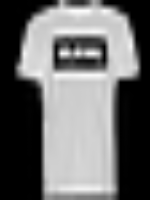

In [ ]:
i=cv2.resize(x_train[1],(150,200))
cv2_imshow(i)

Text(0.5, 1.0, 'T-shirt/top')

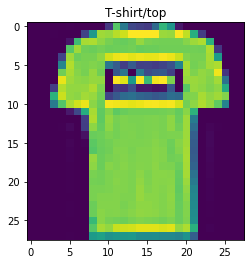

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
plt.title(labels[y_train[1]])

Text(0.5, 1.0, 'Bag')

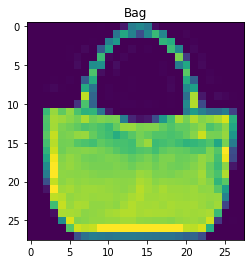

In [ ]:
plt.imshow(x_train[100])
plt.title(labels[y_train[100]])

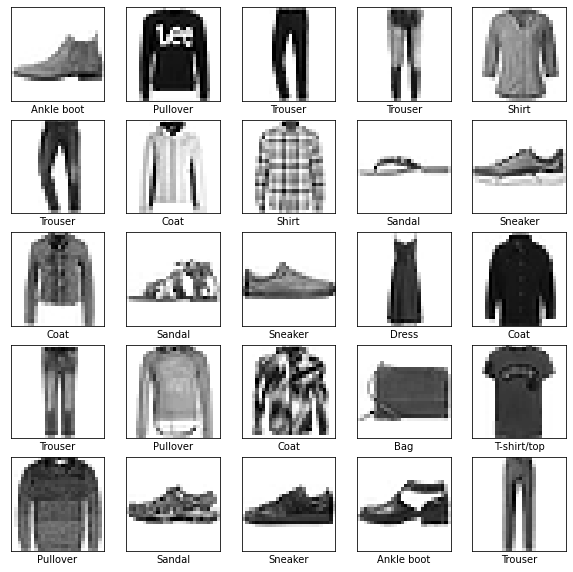

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    #image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_test[i]])
    i += 1
plt.show()


In [ ]:
np.max(x_train[2000])

255

In [ ]:
#normalizing

x_train=x_train/255
x_test=x_test/255

np.max(x_train[2000])

1.0

In [ ]:
28*28*3/2

1176.0

In [ ]:
#NN

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(28,(3,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1176,'relu',input_shape=(28,28,3)))
model.add(tf.keras.layers.Dense(10,'softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train = tf.reshape(x_train, [60000, 28, 28, 1])
x_test = tf.reshape(x_test, [10000, 28, 28, 1])

In [ ]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 25s 7ms/step - loss: 0.3698 - accuracy: 0.8676
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2414 - accuracy: 0.9114
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1879 - accuracy: 0.9303
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1480 - accuracy: 0.9452
Epoch 5/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1168 - accuracy: 0.9561
Epoch 6/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0950 - accuracy: 0.9652
Epoch 7/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0790 - accuracy: 0.9715
Epoch 8/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0664 - accuracy: 0.9763
Epoch 9/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0573 - accuracy: 0.9793
Epoch 10/30
1875/1875 [==============================] - 14s 8ms/step - 

In [ ]:
op = model.predict(x_test)[1]
op = np.argmax(op)
op = labels[op]
print(op)

Pullover


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test.flatten()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[884,   3,  20,  16,   0,   0, 115,   0,   4,   0],
       [  1, 979,   1,   4,   0,   0,   0,   0,   1,   0],
       [ 17,   1, 877,   9,  68,   0,  52,   0,   3,   0],
       [ 10,  11,   9, 922,  32,   0,  21,   0,   5,   0],
       [  3,   3,  39,  19, 852,   0,  69,   0,   1,   0],
       [  0,   0,   0,   0,   0, 982,   0,   2,   1,   9],
       [ 81,   1,  54,  26,  46,   0, 737,   0,   7,   1],
       [  0,   0,   0,   0,   0,  14,   0, 981,   2,  42],
       [  4,   2,   0,   4,   1,   1,   6,   0, 976,   0],
       [  0,   0,   0,   0,   1,   3,   0,  17,   0, 948]])

In [ ]:
accuracy_score(y_pred,y_test)

0.9138

In [ ]:
model.save('DL_Model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 1176)              5566008   
                                                                 
 dense_1 (Dense)             (None, 10)                11770     
                                                                 
Total params: 5,578,058
Trainable params: 5,578,058
Non-trainable params: 0
______________________________________________